## Исследование данных о российском кинопрокате
Заказчик этого исследования — Министерство культуры Российской Федерации. 

Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 

Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
import matplotlib.pyplot as plt

In [3]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_movies.info()
mkrf_movies.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [4]:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
mkrf_shows.info()
mkrf_shows.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
5,111000119,"4,293,649.51"
6,111000212,200.00
7,111000216,"355,567.00"
8,111000313,710.00
9,111000314,"1,607,970.00"


In [5]:
print(mkrf_movies['puNumber'])

0       221048915
1       111013716
2       221038416
3       221026916
4       221030815
          ...    
7481    126008019
7482    121037819
7483    124010819
7484    124010619
7485    124010719
Name: puNumber, Length: 7486, dtype: object


In [6]:
#при попытке перевода значений столбца puNumber в целочисленный тип, была выявлена ошибка содержания "нет" в одной из строк
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#возьмем номер прокатного удостоверения с сайта Министерства Культуры 
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].replace('нет', '111009614')

In [8]:
#воспользуемся подсказкой из п.1.2.4 и удалим все пробелы
mkrf_movies['puNumber'].str.strip()

0       221048915
1       111013716
2       221038416
3       221026916
4       221030815
          ...    
7481    126008019
7482    121037819
7483    124010819
7484    124010619
7485    124010719
Name: puNumber, Length: 7486, dtype: object

In [9]:
#приведем колонку puNumber к целочисленному типу
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

In [10]:
#Объеденим датафреймы
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Полученный датафрейм data получили в результате объединения двух исходных датафреймов с изменением типа данный для столбца puNumber из первого датафрейма. Всего 7486 строк и 15 столбцов.

In [11]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [12]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [13]:
#переименуем столбцы в соответствии с хорошим стилем
data.rename(columns = {'puNumber':'pu_number'}, inplace = True)

In [14]:
#меняем тип данных в колонке show_start_date
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')
data['show_start_date'].head()

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

In [15]:
#проверим значения в столбце ratings
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [16]:
#приведен значения к общему виду
data['ratings'] = data['ratings'].replace('\%', '', regex=True)
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28', '3.7', '1.4', '3.1', '97',
       '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '83', '64', '91', '94', '62', '79', '90', '19', '88', '1.0',
       '89', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '98', '8.9', '9.1'],
      dtype=object)

In [17]:
#приведем значения в колонке ratings к типу float
data['ratings'] = data['ratings'].astype('float')
data.loc[data['ratings'] >= 10.0, 'ratings'] = data['ratings']/10
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [18]:
#проверим общую информацию после изменения типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

В результате первичной предобработки данных переименовали столбец puNumber в соответствии с хорошим стилем, поменял тип данных столбца show_start_date на datetime. Обработали значения в стобце ratings и привели к типу float.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [19]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7486

In [20]:
#посчитаем пропуски
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4327
dtype: int64

In [21]:
#выведем строки с пропусками в колонке film_studio
data.loc[data['film_studio'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Большинство из представленных фильмов в колонке film_studio являются документальными, информация в открытых источниках о производителе отсутствует.

In [22]:
#заменим пропущенные значения на "неизвестно"
data['film_studio'] = data['film_studio'].fillna('неизвестно')

In [23]:
#выведем строки с пропусками в колонке production_country
data.loc[data['production_country'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,неизвестно,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [24]:
#заполним пропуски в колонке production_country из открытых источников
data.loc[3186, 'production_country'] = 'Россия'
data.loc[4441, 'production_country'] = 'Россия'

In [25]:
#выведем строки с пропусками в колонке director
data.loc[data['director'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,неизвестно,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Информация о режиссере в открытых источниках, а также на сайте Министрества Культуры Российской Федерации для пропущенных значений в столбце director отсутствует

In [26]:
#заменим пропущенные значения на "неизвестно"
data['director'] = data['director'].fillna('неизвестно')

In [27]:
#выведем строки с пропусками в колонке producer
data.loc[data['producer'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


Как видно из полученных строк, в основном продюсеры отсутствовали в Советских фильмах, которые субсидировались из государственного бюджета, и такое понятие как "продюсер" там отсутствовало. Оставим данные без изменений.

Одинаковое количество пропусков в колонках refundable_support, nonrefundable_support, budget, financing_source обусловлены тем, что данные фильмы снимались без господдержки. Оставим их без изменений.

Пропуски в колонке ratings мы ничем заменить не можем, так как каждая картина индивидуальна и брать среднее значение по жанру будет некорректно. Оставим их без изменений.

Доля пропусков в колонке genres составляет 13% от общей выборки, оставим эти данные без изменений

In [28]:
data['genres'] = data['genres'].fillna('неизвестно')

Все имеющиеся значения в колонке box_office появились из второго датасета после объединения, пропуски обусловлены отсутствием этой колонки в первом исходном датасете, ничем заменить не можем.

In [29]:
#оценим количество пропусков после предобработки данных
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                      0
box_office               4327
dtype: int64

В результате дальнейшей предобработки данных, из открытых источников удалось восполнить недостающие данные о стране-производителе

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [30]:
#посчитаем количество дубликатов в датафрейме
data.duplicated().sum()

0

In [31]:
#посчитаем количество дубликатов по столбцу title
data['title'].duplicated().sum()

714

In [32]:
#выведем дубликаты по столбцу title
data[data['title'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


In [33]:
#выведем строки со значением в title Отель "Гранд Будапешт"
data[data['title'] == 'Отель "Гранд Будапешт"']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1412,"Отель ""Гранд Будапешт""",121002214,2014-02-07 12:00:00+00:00,Художественный,"Скотт Рудин Продакшнз, Индиан Пантбруш, Студио...",США - Германия,Уэс Андерсон,"Уэс Андерсон, Джереми Доусон, Молли Купер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив","2,413,090.20"
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN


На примере картины "Отель "Гранд Будапешт"" можно увидеть, что фильму 2 раза давали прокатное удостоверение, в 2014 и 2019 году соответственно. Дубликаты появились именно по этой причине.

In [34]:
#посчитаем количество дубликатов по столбцу pu_number
data['pu_number'].duplicated().sum()

3

In [35]:
#выведем дубликаты по столбцу pu_number
data[data['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,неизвестно,0.00
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,неизвестно,0.00
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


In [36]:
#выведем строку 4639
data.loc[4639, 'title']

'Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/'

In [37]:
#выведем все строки, содержащие в title название фильма "Иоанна - женщина на папском престоле"
data[data['title'] == 'Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4050,Иоанна - женщина на папском престоле /По роман...,121005410,2010-03-25 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
4513,Иоанна - женщина на папском престоле /По роман...,221141710,2010-12-03 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


При изучении дубликатов по колонке pu_number наблюдается та же картина, как и по колонке title. 

Прокатные удостоверения не имеют точный срок действия .Его могут выдать как на месяц, так и  на 5 лет. Точную информацию получить невозможно. 

Исходя из этого, можно сделать общий вывод, что фильмам выдавали ограниченное по сроку действия прокатные удостоверения. Далее прокат фильмов в кинотеатрах продлевали, присваивая им новые номера прокатных удостоверений, именно этим обусловлены многочисленные дубликаты в датафрейме.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [38]:
#выведем часто встречающиеся значения столбца type
data['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [39]:
#уберем пробелы в начале и конце строки столбца type
data['type'] = data['type'].str.strip()

In [40]:
#выведем часто встречающиеся значения столбца type после обработки данных
data['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [41]:
#уберем пробелы в начале и конце строки столбца film_studio
data['film_studio'] = data['film_studio'].str.strip()

In [42]:
#уберем пробелы в начале и конце строки столбца production_country
data['production_country'] = data['production_country'].str.strip()

In [43]:
#выведем часто встречающиеся значения столбца production_country после обработки данных
data['production_country'].value_counts()

США                                                                                         2175
Россия                                                                                      1823
СССР                                                                                         377
Франция                                                                                      302
Великобритания                                                                               259
                                                                                            ... 
США - Франция - Бельгия - Италия                                                               1
США - Франция - ЮАР                                                                            1
Россия - США                                                                                   1
Франция - Чехия - Великобритания                                                               1
Босния и Герцеговина - Франция

In [44]:
#уберем пробелы в начале и конце строки столбца director
data['director'] = data['director'].str.strip()

In [45]:
#уберем пробелы в начале и конце строки столбца producer
data['producer'] = data['producer'].str.strip()

In [46]:
#уберем пробелы в начале и конце строки столбца age_restriction
data['age_restriction'] = data['age_restriction'].str.strip()

In [47]:
#выведем часто встречающиеся значения столбца type после обработки данных
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [48]:
#уберем пробелы в начале и конце строки столбца genres
data['genres'] = data['genres'].str.strip()

In [49]:
#выведем часто встречающиеся значения столбца genres после обработки данных
data['genres'].value_counts()

неизвестно                          976
драма                               476
комедия                             352
мелодрама,комедия                   222
драма,мелодрама,комедия             189
                                   ... 
комедия,мелодрама,фантастика          1
биография,мелодрама,драма             1
приключения,история,драма             1
фантастика,приключения,детектив       1
аниме,мультфильм,короткометражка      1
Name: genres, Length: 743, dtype: int64

In [50]:
#уберем пробелы в начале и конце строки столбца financing_source
data['financing_source'] = data['financing_source'].str.strip()

In [51]:
#выведем часто встречающиеся значения столбца financing_source после обработки данных
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

Проблемные значения в поле type были обусловлены лишними пробелами, их удалось исправить. 

Проблемными представляются значения в столбцах film_studio, production_country, producer, genres, так как в них представлены несколько значений. Но исходя из дальнейших задач, по-настоящему проблемными могут стать данные из колонки financing_source, где значение "Министерство культуры, Фонд кино" встречается 22 раза. Эти данные понадобятся для дальнейшего исследования фильмов с господдержкой.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [52]:
#сгруппируем колонки с количетсвенными данными и проанализируем их
quantitative_columns = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office', 'ratings']
data[quantitative_columns].describe()

,refundable_support,nonrefundable_support,budget,box_office,ratings
count,332.00,332.00,332.00,"3,159.00","6,519.00"
mean,"11,864,457.83","48,980,988.89","127,229,716.68","76,454,486.38",6.49
std,"24,916,555.26","59,980,117.92","188,588,333.12","240,318,917.44",1.11
min,0.00,0.00,0.00,0.00,1.00
25%,0.00,"25,000,000.00","42,000,000.00","85,671.50",5.90
50%,0.00,"30,000,000.00","68,649,916.00","2,325,871.10",6.60
75%,"15,000,000.00","40,375,000.00","141,985,319.50","23,976,224.35",7.20
max,"180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79",9.90


<div class="alert alert-info">
В анализ добавлены столюцы box_office и genres

Бюджет фильма складывается из возвратных и невозвратных средств, а также частных поступлений. Проверим, есть ли случаи, когда сумма возвратных и невозвратных средств превышает бюджет:

In [53]:
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Примем процент финансирования фильмов государством за 100. Тогда заменим значения в колонке budget, на сумму возвратных и невозвратных средств, только в тех случаях, где сумма возвратных и невозвратных средств превышает бюджет:

In [54]:
#создадим собственную функцию для подсчета
def new_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        return row['refundable_support'] + row['nonrefundable_support']
    return row['budget']

In [55]:
data['right_budget'] = data.apply(new_budget, axis=1)

In [56]:
data['budget'] = data['right_budget']

In [57]:
data.drop('right_budget', axis= 1 , inplace= True ) 

In [58]:
#проверим количество неверных данных после обработки
len(data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']])

0

В рузультате анализа количественных значений были исправлены аномалии в столбце budget 

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [59]:
#cоздаем столбец с информацией о годе проката
data['year_appearance'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [60]:
#создадим собсвтенную функцию для 
def first_value(add_columns):
    add_columns = add_columns.split(',')
    return add_columns[0]
data['main_director'] = data['director'].apply(first_value)
data['main_genres'] = data['genres'].apply(first_value)
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_appearance,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [61]:
data['rate_budget'] = (data['refundable_support'] + data['nonrefundable_support'])/data['budget']
data['rate_budget'] = data['rate_budget'].round(2)

In [62]:
data['rate_budget'].unique()

array([ nan, 0.33, 0.7 , 0.61, 0.69, 0.62, 0.48, 0.68, 0.54, 0.35, 0.28,
       0.37, 1.  , 0.5 , 0.13, 0.63, 0.66, 0.67, 0.21, 0.12, 0.41, 0.25,
       0.39, 0.53, 0.22, 0.34, 0.43, 0.36, 0.65, 0.18, 0.32, 0.6 , 0.64,
       0.3 , 0.56, 0.59, 0.17, 0.51, 0.1 , 0.23, 0.44, 0.38, 0.31, 0.47,
       0.16, 0.78, 0.45, 0.52, 0.27, 0.49, 0.55, 0.24, 0.07, 0.29, 0.46,
       0.04, 0.57, 0.42, 0.2 , 0.26, 0.58, 0.08, 0.09])

В результате предобработки данных:

- переименован столбец puNumber в соответствии с хорошим стилем
- скоррективан тип данных столбца show_start_date на datetime
- обработаны значения в стобце ratings и приведены к типу float
- восполнены значения из открытых источников в столбце production_country
- изучены дубликаты, было решено их не удалять
- обработы категориальные значения, в частности в колонке type
- изучены количественные значения, скорректированы данные в столбце budget
- добавлены новые столбцы с информацией о годе проката, с именем и фамилией главного режиссера и основным жанром фильма и долю господдержки от общего бюджета фильма

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [63]:
#посчитаем, сколько данных о прокате известно
data.groupby('year_appearance')['box_office'].count().sum()

3159

In [64]:
#посчитаем общее количество фильмов по годам
films_per_year = data.pivot_table(index='year_appearance', values='title', aggfunc=['count']).reset_index()
films_per_year.columns = ['year_appearance', 'total_films']
films_per_year

,year_appearance,total_films
0,2010,985
1,2011,622
2,2012,593
3,2013,630
4,2014,807
5,2015,705
6,2016,818
7,2017,505
8,2018,891
9,2019,930


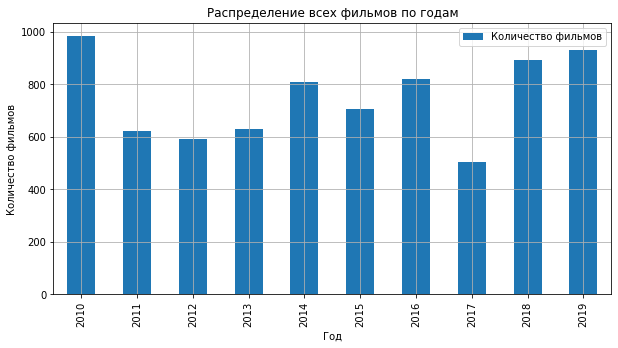

In [65]:
#построим гистограмму
films_per_year.plot(x='year_appearance', y='total_films', kind='bar', figsize=(10,5), grid=True)
plt.title('Распределение всех фильмов по годам');
plt.xlabel('Год');
plt.ylabel('Количество фильмов');
plt.legend(['Количество фильмов']);
plt.show()

Распределение неоднородно. Нет линейной зависимости количества произведенных фильмов от года.

In [66]:
#посчитаем, сколько фильмов по годам выходило в прокат
cinema_per_year = data.pivot_table(index='year_appearance', values='box_office', aggfunc=['count']).reset_index()
cinema_per_year.columns = ['year_appearance', 'cinema_films']
cinema_per_year

,year_appearance,cinema_films
0,2010,105
1,2011,109
2,2012,128
3,2013,184
4,2014,280
5,2015,465
6,2016,526
7,2017,357
8,2018,475
9,2019,530


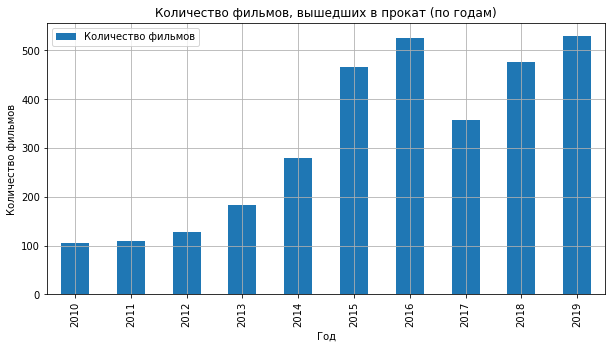

In [67]:
#построим гистограмму
cinema_per_year.plot(x='year_appearance', y='cinema_films', kind='bar', figsize=(10,5), grid=True)
plt.title('Количество фильмов, вышедших в прокат (по годам)');
plt.xlabel('Год');
plt.ylabel('Количество фильмов');
plt.legend(['Количество фильмов']);
plt.show()

С 2010 по 2016 год количество фильмов, выходивших в прокат, неизменно росло. В 2017 году наблюдается спад, так как в этом году было мало произведено фильмов. Линейный рост фильмов, показанных в кинотеатре, также можно объяснить увеличением количества кинозалов (открытые данные с сайта Невафильм https://www.research.nevafilm.ru/research/statistika/) 

In [68]:
#объеденим данные в одну таблицу
table = cinema_per_year.merge(films_per_year, on='year_appearance', how='left')
table

,year_appearance,cinema_films,total_films
0,2010,105,985
1,2011,109,622
2,2012,128,593
3,2013,184,630
4,2014,280,807
5,2015,465,705
6,2016,526,818
7,2017,357,505
8,2018,475,891
9,2019,530,930


In [69]:
#получим долю фильмов, вышедших в прокат от общего числа
table['cinema_films_ratio, %'] = ((table['cinema_films']/table['total_films'])*100).round(1)
table

,year_appearance,cinema_films,total_films,"cinema_films_ratio, %"
0,2010,105,985,10.70
1,2011,109,622,17.50
2,2012,128,593,21.60
3,2013,184,630,29.20
4,2014,280,807,34.70
5,2015,465,705,66.00
6,2016,526,818,64.30
7,2017,357,505,70.70
8,2018,475,891,53.30
9,2019,530,930,57.00


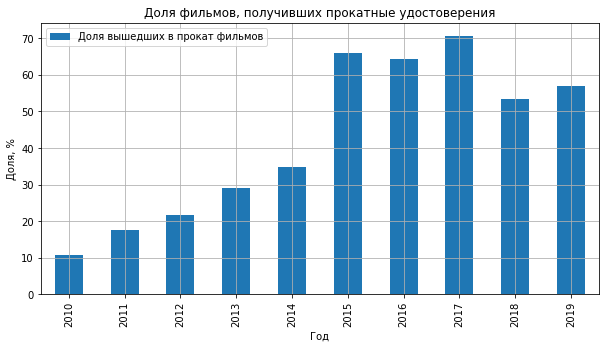

In [70]:
#построим столбчатую диаграмму
table.plot(x='year_appearance', y='cinema_films_ratio, %', kind='bar', figsize=(10,5), grid=True)
plt.title('Доля фильмов, получивших прокатные удостоверения');
plt.xlabel('Год');
plt.ylabel('Доля, %');
plt.legend(['Доля вышедших в прокат фильмов'])
plt.show()

Данные неоднородны. Доля фильмов с 2010 по 2015 год неуклонно росла. Максимальная доля пришлась на 2017 год, но именно в этот год было произведено меньше всего фильмов. Самое большое количество кинопоказов в кинотеатрах в 2019, хотя доля этих фильмов за этот год в нашей выборке не самая большая в сравнение с другими годами.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [71]:
#сгруппируем данные по году проката и сборам в отдельную таблицу
box_per_year = data.pivot_table(index='year_appearance', values='box_office', aggfunc=['sum']).reset_index()
box_per_year.columns = ['year_appearance', 'box_office']
box_per_year

,year_appearance,box_office
0,2010,"2,428,654.00"
1,2011,"14,102,765.00"
2,2012,"6,955,423.00"
3,2013,"29,799,706.20"
4,2014,"7,444,951,859.20"
5,2015,"39,497,365,196.40"
6,2016,"47,866,299,741.91"
7,2017,"48,563,707,217.51"
8,2018,"49,668,403,134.32"
9,2019,"48,425,708,779.59"


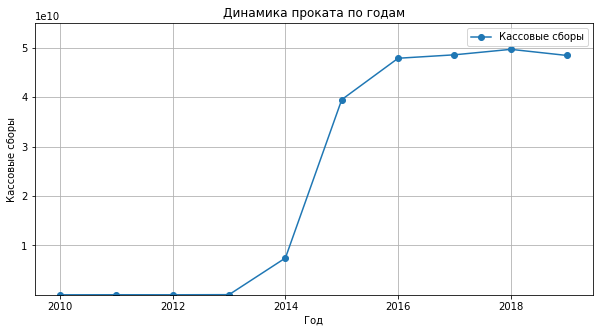

In [72]:
#построим график динамики проката по годам
box_per_year.plot(x='year_appearance', y='box_office', style='o-',  ylim=(2500000, 55000000000), figsize=(10,5), title='Динамика проката по годам', grid=True)
plt.xlabel('Год');
plt.ylabel('Кассовые сборы');
plt.legend(['Кассовые сборы']);
plt.show()

Минимальная сумма сборов была в 2010 году, а максимальная в 2018. В целом, начиная с 2016 года, сумма сборов остается на уровне 5 миллиардов рублей.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.го

In [73]:
#посчитаем среднюю и медианную сумму сборов для каждого года
box_dynamics = data.pivot_table(index='year_appearance', values='box_office', aggfunc=['mean', 'median']).reset_index()
box_dynamics.columns = ['year_appearance', 'mean_value', 'median_value']
box_dynamics

,year_appearance,mean_value,median_value
0,2010,"23,130.04","1,700.00"
1,2011,"129,383.17","3,000.00"
2,2012,"54,339.24","5,660.00"
3,2013,"161,954.92","3,522.50"
4,2014,"26,589,113.78","18,137.50"
5,2015,"84,940,570.31","4,920,933.00"
6,2016,"91,000,569.85","3,846,679.41"
7,2017,"136,032,793.33","9,968,340.00"
8,2018,"104,565,059.23","8,891,102.21"
9,2019,"91,369,261.85","4,627,798.34"


Медианное и среднее значение по годам сильно отличаются. Это может быть обусловлено фильмами-лидерами проката, у которых большие сборы, они в данном случае являются аномалиями, поэтому лучше судить о доходности фильма по медианному значению. Минимальное значение наблюдается в 2010 году, наилучший показатель в 2017 году - каждый фильм заработал около 10 миллионов рублей.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [74]:
#выведем срез данных с 2015 по 2019 год и построим сводную таблицу
restriction = data.query('year_appearance >= 2015') \
.pivot_table(index='year_appearance', columns='age_restriction', values='box_office', aggfunc='count')
restriction.columns = ['0+', '12+', '16+', '18+', '6+']
restriction = restriction[['0+', '6+', '12+', '16+', '18+']]
restriction = restriction.drop('0+', axis=1)
restriction

,6+,12+,16+,18+
year_appearance,,,,
2015,53,73,168,132
2016,70,82,182,151
2017,45,41,121,147
2018,68,67,156,179
2019,81,85,178,183


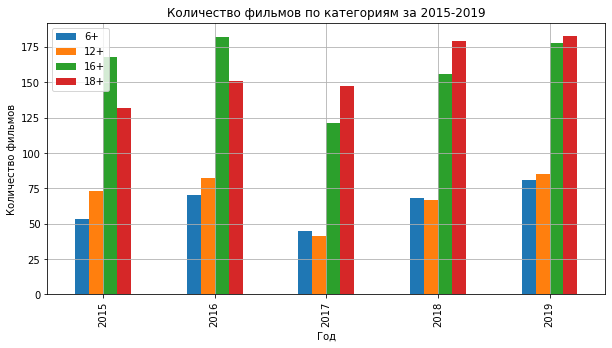

In [75]:
restriction.plot(kind='bar', grid=True, figsize=(10,5), title='Количество фильмов по категориям за 2015-2019')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()

In [76]:
restriction = data.query('year_appearance >= 2015') \
.pivot_table(index='year_appearance', columns='age_restriction', values='box_office', aggfunc='sum')
restriction.columns = ['0+', '12+', '16+', '18+', '6+']
restriction = restriction[['0+', '6+', '12+', '16+', '18+']]
restriction = restriction.drop('0+', axis=1)
restriction

,6+,12+,16+,18+
year_appearance,,,,
2015,"8,701,799,371.41","13,616,082,008.91","11,368,120,870.27","5,432,308,367.44"
2016,"12,053,146,008.24","12,204,446,524.39","16,664,548,541.74","6,793,929,818.87"
2017,"12,086,142,145.76","7,851,427,660.67","18,745,042,900.06","9,651,495,581.02"
2018,"10,104,974,623.41","14,267,291,660.69","16,503,602,346.96","8,760,085,501.15"
2019,"12,852,548,650.86","12,680,198,773.67","12,753,418,984.60","10,121,796,303.64"


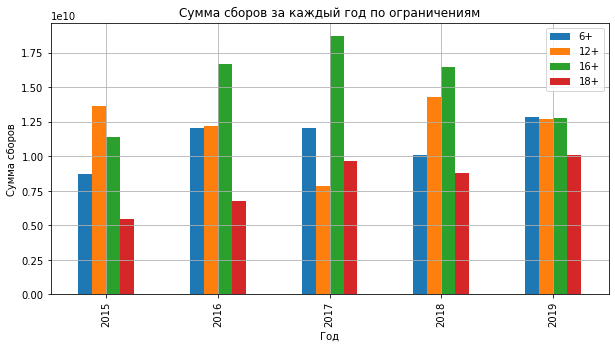

In [77]:
restriction.plot(kind='bar', grid=True, figsize=(10,5), title='Сумма сборов за каждый год по ограничениям')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.show()

В 2015 году наибольшие сборы были у фильмов категории 12+. с 2016 по 2018 год у фильмов 16+. В 2019 году сборы у фильмов категории 6+, 12+, 16+ были практически идентичными. 

In [78]:
#выведем срез данных с 2015 по 2019 год и построим сводную таблицу
restriction = data.query('year_appearance >= 2015') \
.pivot_table(index='age_restriction', values='box_office', aggfunc=['sum'])
restriction.columns = ['Сумма сборов за 2015-2019г.']
restriction.index =['0+', '12+', '16+', '18+', '6+']
restriction = restriction.drop(index='0+')
restriction

,Сумма сборов за 2015-2019г.
12+,"60,619,446,628.33"
16+,"76,034,733,643.63"
18+,"40,759,615,572.12"
6+,"55,798,610,799.68"


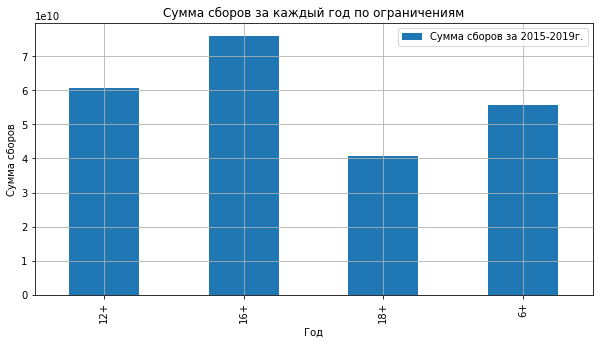

In [79]:
restriction.plot(kind='bar', grid=True, figsize=(10,5), title='Сумма сборов за каждый год по ограничениям')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.show()

За период с 2015 по 2019 год наибольшие сборы были у фильмов категории 16+, так как это самый распространенный присваиваемый рейтинг и больше всего картин было произведено за данный период. Наименьшие показатели сборов у фильмов категории 18+, так как там могут содержаться нецензурная брань, эротические сцены. А так как поход в кинотеатр в большинстве случаев является семейным досугом, зритель предпочитает делать свой выбор в пользу других картин.

Возрастное ограничение в первую очередь может влиять на сборы фильмов 16+ и 18+, так как эти картины практически исключают варианты семейного похода в кино (идеализируем ситуацию, когда на входе в кинозал контроллер запрашивает документы на ребенка/подростка и не впускает на сеанс в виду не соблюдения возрастного ограничения). Но как показывает практика, это все-таки больше влияет на сборы фильмов категории 18+. 

По графику почти во все годы лидирует по сборам кино 16+, так как это универсальная возрастная категория, под которую попадают большинство картин. Также стоит отметить, что за последние 3 года значительно увеличилось число фильмов 18+, частично это обусловлено набирающим популярность жанром "фильмов-ужасов". 

Фильмы категории 6+ стабильно пользуются популярностью у зрителей, в 2019 году даже обогнали по сборам фильмы категории 16+. В основном под эту категорию попадают мультфильмы, на которые каждые выходные и праздники водят детей, соответственно как минимум 1 родитель также присутствует и "делает кассу" фильму.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [81]:
#найдем количество фильмос с господдержкой
support = data[data['budget'].isna() == False].copy()
support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   pu_number              332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

In [82]:
#вычислим процент субсидируемых фильмов от общего числа произведенных
percentage = (len(support)/len(data))*100
percentage

4.43494523109805

In [83]:
#выведем отдельной колонкой общую господдерждку
support['total_support'] = support['refundable_support'] + support['nonrefundable_support']
support.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year_appearance,main_director,main_genres,rate_budget,total_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,0.33,"26,500,000.00"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,NaN,неизвестно,"28,140.00",2014,А.Якимчук,неизвестно,0.70,"26,000,000.00"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61,"107,847,945.00"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,"28,000,000.00"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,0.62,"25,000,000.00"


In [84]:
#посчитаем, для скольких фильмов отсутствует информация по сборам
len(support[support['box_office'].isna() == True])

14

In [85]:
#выведем строки с пропущенными значениями в box_office
support.loc[support['box_office'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year_appearance,main_director,main_genres,rate_budget,total_support
2800,Золотая рыбка (2015),111018715,2015-10-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.00,...,"41,998,984.00",Министерство культуры,6.30,драма,NaN,2015,А.Галибин,драма,0.60,"25,000,000.00"
3337,Любовь и Сакс,111001217,2017-02-16 12:00:00+00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.00,...,"61,000,000.00",Министерство культуры,5.20,мелодрама,NaN,2017,А.Сурикова,мелодрама,0.16,"10,000,000.00"
3711,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 12:00:00+00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.00,...,"18,706,080.00",Министерство культуры,7.00,"мультфильм,приключения,детектив",NaN,2016,А.Романец,мультфильм,0.62,"11,520,000.00"
5661,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.00,...,"44,600,000.00",Министерство культуры,7.20,"детский,комедия",NaN,2017,Е.Соколов,детский,0.56,"25,000,000.00"
6476,Зима,111023518,2019-03-15 12:00:00+00:00,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0.00,...,"39,700,000.00",Министерство культуры,5.20,"драма,криминал",NaN,2019,С.Черников,драма,0.63,"25,000,000.00"
6709,Мальчик русский,111002619,2019-02-20 12:00:00+00:00,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,NaN,«12+» - для детей старше 12 лет,0.00,...,"46,941,140.00",Министерство культуры,6.10,"драма,военный,история",NaN,2019,А.Золотухин,драма,0.64,"30,000,000.00"
6968,Танец с саблями,111008619,2019-05-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+» - для детей старше 16 лет,0.00,...,"61,571,449.00",Министерство культуры,5.80,"драма,история,биография",NaN,2019,Ю.Разыков,драма,0.65,"40,000,000.00"
7009,Куратор,111010019,2019-06-13 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс",Россия - Грузия,П.Левченко,Е.Филиппова,«16+» - для детей старше 16 лет,0.00,...,"60,668,576.00",Министерство культуры,4.90,"драма,криминал,детектив",NaN,2019,П.Левченко,драма,0.41,"25,000,000.00"
7180,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00+00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.00,...,"33,000,000.00",Министерство культуры,8.00,семейный,NaN,2019,А.Попова,семейный,0.09,"3,000,000.00"
7229,На Луне,111015519,2019-11-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.00,...,"57,876,000.00",Министерство культуры,6.60,"приключения,триллер",NaN,2019,Е.Михалков-Кончаловский,приключения,0.60,"35,000,000.00"


Из 332 фильмов у 14 отсутствуют данные сборов в рублях. Попробуем их заполнить из открытых источников:

In [86]:
#заполним пропуски
support.loc[6476, 'box_office'] = 13728503
support.loc[6709, 'box_office'] = 1944161
support.loc[6968, 'box_office'] = 2740661
support.loc[7009, 'box_office'] = 151567
support.loc[7180, 'box_office'] = 17899510
support.loc[7229, 'box_office'] = 2077588
support.loc[7344, 'box_office'] = 974025
support.loc[7474, 'box_office'] = 1999139416
support.loc[7478, 'box_office'] = 974933338
support.loc[support['box_office'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year_appearance,main_director,main_genres,rate_budget,total_support
2800,Золотая рыбка (2015),111018715,2015-10-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.00,...,"41,998,984.00",Министерство культуры,6.30,драма,NaN,2015,А.Галибин,драма,0.60,"25,000,000.00"
3337,Любовь и Сакс,111001217,2017-02-16 12:00:00+00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.00,...,"61,000,000.00",Министерство культуры,5.20,мелодрама,NaN,2017,А.Сурикова,мелодрама,0.16,"10,000,000.00"
3711,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 12:00:00+00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.00,...,"18,706,080.00",Министерство культуры,7.00,"мультфильм,приключения,детектив",NaN,2016,А.Романец,мультфильм,0.62,"11,520,000.00"
5661,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.00,...,"44,600,000.00",Министерство культуры,7.20,"детский,комедия",NaN,2017,Е.Соколов,детский,0.56,"25,000,000.00"
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,"46,154,000.00",Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.65,"30,000,000.00"


Для оставшихся фильмов данные по сборам отсутствуют, так как это в основном цифровые релизы.

На основании данных бюджета и сборов, проанализируем прибыль:

In [87]:
support['profit'] = support['box_office'] - support['budget']
support.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year_appearance,main_director,main_genres,rate_budget,total_support,profit
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,0.33,"26,500,000.00","-79,046,546.40"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,NaN,неизвестно,"28,140.00",2014,А.Якимчук,неизвестно,0.70,"26,000,000.00","-37,114,717.00"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61,"107,847,945.00","-156,066,458.50"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,"28,000,000.00","-40,518,222.50"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,0.62,"25,000,000.00","-39,783,022.00"


In [88]:
#проанализируем количественные данные датафрейма
support.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,year_appearance,rate_budget,total_support,profit
count,332.00,332.00,332.00,332.00,316.00,327.00,332.00,332.00,332.00,327.00
mean,"111,593,819.10","11,864,457.83","48,980,988.89","131,422,395.80",6.02,"138,003,358.85","2,016.72",0.54,"60,845,446.72","5,221,168.21"
std,"5,703,031.32","24,916,555.26","59,980,117.92","187,148,242.67",1.15,"349,574,577.05",1.64,0.20,"72,755,459.47","320,259,169.71"
min,"111,000,115.00",0.00,0.00,"6,000,000.00",1.00,"1,550.00","2,013.00",0.04,"3,000,000.00","-1,971,477,243.41"
25%,"111,004,891.50",0.00,"25,000,000.00","45,524,799.50",5.30,"1,241,449.00","2,015.00",0.38,"25,333,750.00","-69,993,563.50"
50%,"111,010,367.00",0.00,"30,000,000.00","71,196,901.50",6.20,"15,078,858.60","2,017.00",0.61,"35,000,000.00","-40,843,410.00"
75%,"111,017,815.75","15,000,000.00","40,375,000.00","150,000,000.00",6.70,"106,231,715.52","2,018.00",0.66,"60,000,000.00","-2,411,666.49"
max,"214,010,116.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.40,"3,073,568,690.79","2,019.00",1.00,"500,000,000.00","2,913,568,690.79"


In [89]:
len(support.query('profit > 0'))/len(support)

0.24397590361445784

Мы видим, что средняя поддержка фильма государством составляет 54%, а средняя прибыль составляет 5,22млн. рублей, но окупаются только 25%

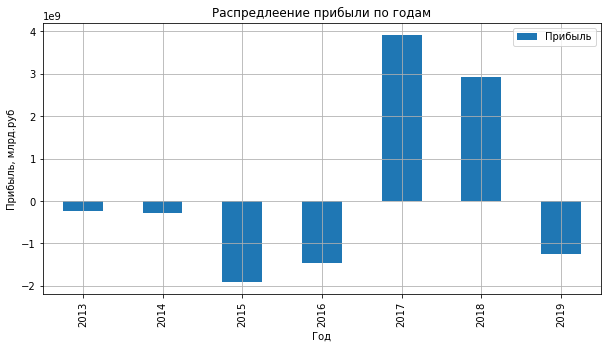

In [90]:
#оценим распределение прибыли по годам
support.pivot_table(index='year_appearance', values='profit', aggfunc='sum') \
.plot(kind='bar', grid=True, figsize=(10,5), title='Распредлеение прибыли по годам')
plt.xlabel('Год')
plt.ylabel('Прибыль, млрд.руб')
plt.legend(['Прибыль'])
plt.show()

Из всей выборки, прибыль была только в 2017 и 2018 году

In [91]:
#оценим в количественном соотношении поддержку фильмов по годам
support.groupby('year_appearance')['total_support'].count()

year_appearance
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: total_support, dtype: int64

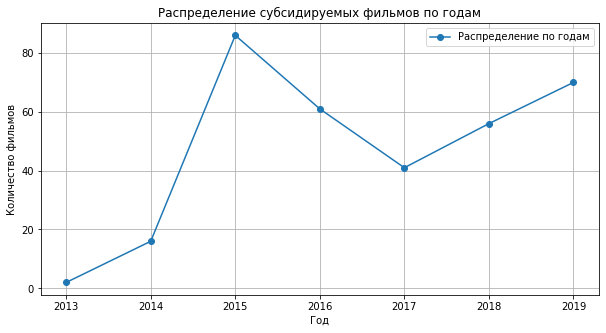

In [92]:
#оценим распределение господдерждки по годам
support.pivot_table(index='year_appearance', values='total_support', aggfunc='count') \
.plot(title='Распределение субсидируемых фильмов по годам', style='o-', grid=True, figsize=(10,5));
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.legend(['Распределение по годам'])
plt.show()

86 фильмов получили господдердку в 2015 году, это самый большой показатель. Наименьшее число фильмов с господдержкой было в 2013 году - финансирование получило всего лищь 2 картины.

In [93]:
#посмотрим, сколько средств выделялось на каждый год
support.groupby('year_appearance')['total_support'].sum()

year_appearance
2013     134,347,945.00
2014     572,002,299.00
2015   3,656,241,459.00
2016   4,303,155,482.00
2017   3,183,971,662.00
2018   3,446,969,465.00
2019   4,904,000,000.00
Name: total_support, dtype: float64

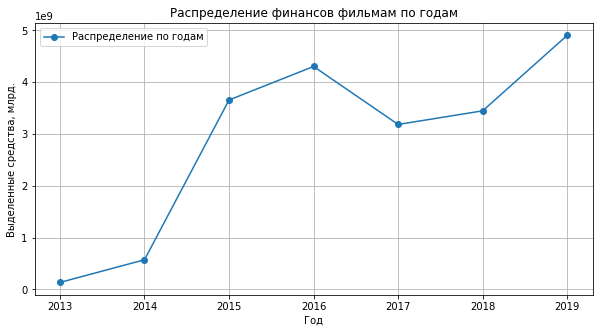

In [94]:
#оценим распределение выделенных средств по годам
support.pivot_table(index='year_appearance', values='total_support', aggfunc='sum')\
.plot(title='Распределение финансов фильмам по годам', style='o-', grid=True, figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Выделенные средства, млрд.')
plt.legend(['Распределение по годам'])
plt.show()

Самую большую финансовую поддержку получили картины в 2019 году. Несмотря на то, что количество фильмов в 2016 году уменьшилось, относительно 2015 года, сумма господдержки увеличилась.

In [95]:
#сократим период анализа, убрав из выборки данные за 2013 и 2014 год
support = support[support['year_appearance'] > 2014]

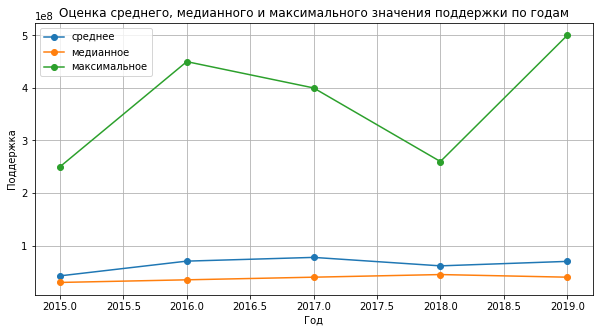

In [96]:
#оценим средние и медианные значения выделенных средств по годам
support.pivot_table(index='year_appearance', values='total_support', aggfunc=['mean', 'median', 'max']) \
.plot(title='Оценка среднего, медианного и максимального значения поддержки по годам', style='o-', grid=True, figsize=(10,5));
plt.xlabel('Год')
plt.ylabel('Поддержка')
plt.legend(['среднее', 'медианное', 'максимальное'])
plt.show()

Среднее значение за каждый год превышеает медианное. Это обусловлено аномалиями, так как мы видим, что к примеру в 2019 году одна картина получила финансирование на 500млн. рублей, что превышает медианное значение за этот год в 10 раз.

In [97]:
support['main_genres'].value_counts().head(20)

драма          85
комедия        71
мультфильм     30
неизвестно     15
триллер        15
мелодрама      13
фэнтези        11
фантастика     10
ужасы          10
военный         9
приключения     7
боевик          6
детектив        5
семейный        5
история         4
детский         4
мюзикл          4
спорт           3
биография       3
криминал        3
Name: main_genres, dtype: int64

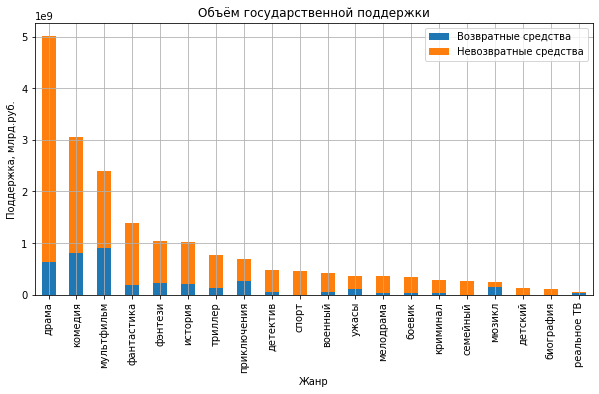

In [99]:
support.query('main_genres != "неизвестно"').groupby('main_genres').agg('sum').sort_values(by='total_support', ascending=False) \
.plot(y=['refundable_support', 'nonrefundable_support'], title='Объём государственной поддержки', kind='bar', grid=True, figsize=(10,5), stacked=True);
plt.xlabel('Жанр')
plt.ylabel('Поддержка, млрд.руб.')
plt.legend(['Возвратные средства', 'Невозвратные средства'])
plt.show()

Больше всего бюджетных средств получили фильмы жанра "драма"

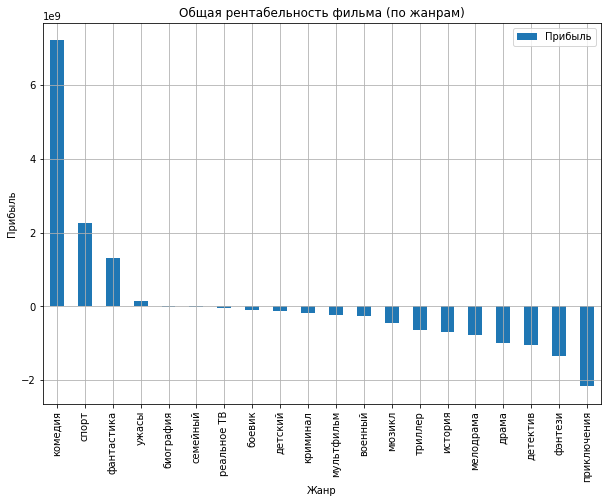

In [100]:
#оценим общую рентабильность фильмов по жанрам
support.query('main_genres != "неизвестно"').groupby('main_genres').agg('sum').sort_values(by='profit', ascending=False) \
.plot(y='profit', title='Общая рентабельность фильма (по жанрам)', kind='bar', figsize=(10,7), grid=True)
plt.xlabel('Жанр');
plt.ylabel('Прибыль');
plt.legend(['Прибыль'])
plt.show()

За весь период самыми рентабильными оказались картины жанра "комедии"

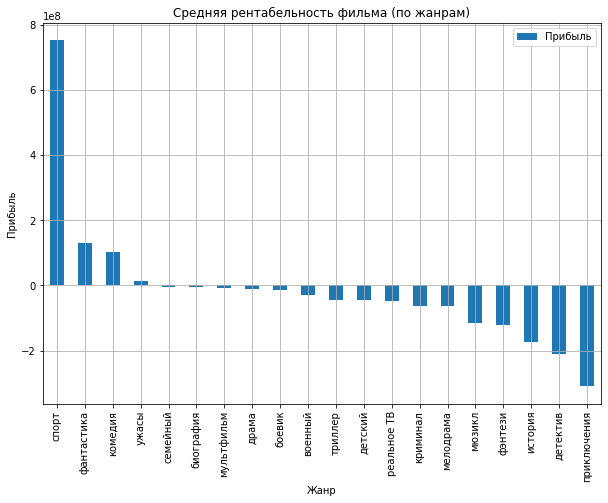

In [101]:
#оценим среднюю рентабильность фильмов по жанрам
support.query('main_genres != "неизвестно"').groupby('main_genres').agg('mean').sort_values(by='profit', ascending=False) \
.plot(y='profit', title='Средняя рентабельность фильма (по жанрам)', kind='bar', figsize=(10,7), grid=True)
plt.xlabel('Жанр');
plt.ylabel('Прибыль');
plt.legend(['Прибыль'])
plt.show()

Самыми окупаемыми в пересчете на 1 картину, являются фильмы жанра "спорт"

In [102]:
#выведем данные по жанру "спорт"
support.loc[support['main_genres'] == 'спорт']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year_appearance,main_director,main_genres,rate_budget,total_support,profit
3135,Чемпионы: Быстрее. Выше. Сильнее,111021115,2015-12-22 12:00:00+00:00,Художественный,"ООО ""Энджой мувиз""",Россия,А.Аксененко,"Г.Малков, В.Поляков",«6+» - для детей старше 6 лет,0.00,...,Фонд кино,7.00,"спорт,драма","168,688,859.10",2015,А.Аксененко,спорт,0.44,"40,000,000.00","78,412,085.10"
3785,Эластико,111016416,2016-10-18 12:00:00+00:00,Художественный,"ООО ""Пятый элемент"", ООО ""РЕНОВАЦИО интертейнм...",Россия,М.Расходников,"Г.Малков, В.Поляков, Е.замалиев, А.Кузьминов, ...",«12+» - для детей старше 12 лет,0.00,...,Фонд кино,6.30,"спорт,мелодрама,криминал","19,393,384.34",2016,М.Расходников,спорт,0.50,"15,000,000.00","-10,606,615.66"
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,...,Фонд кино,7.50,"спорт,драма","2,779,686,144.00",2017,А.Мегердичев,спорт,0.68,"400,000,000.00","2,189,493,953.00"


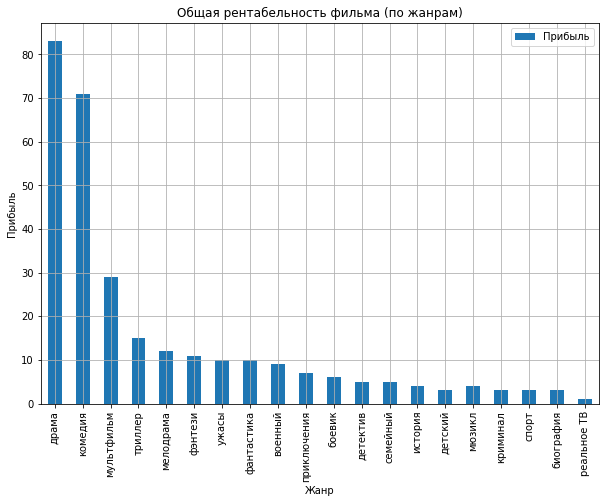

In [103]:
#оценим какие фильмы поддерживали по жанрам
support.query('main_genres != "неизвестно"').groupby('main_genres').agg('count').sort_values(by='total_support', ascending=False) \
.plot(y='profit', title='Общая рентабельность фильма (по жанрам)', kind='bar', figsize=(10,7), grid=True)
plt.xlabel('Жанр');
plt.ylabel('Прибыль');
plt.legend(['Прибыль'])
plt.show()

За период с 2015 по 2019 год больше всего было профинансировано фильмов жанров "драма" и "комедия"

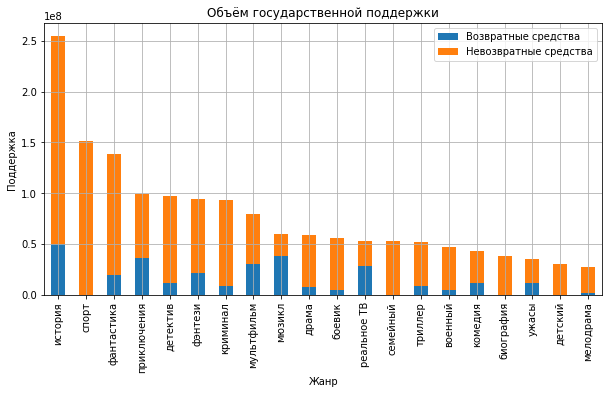

In [104]:
#оценим сколько в среднем составляет господдердка на 1 фильм каждого жанра
support.query('main_genres != "неизвестно"').groupby('main_genres').agg('mean').sort_values(by='total_support', ascending=False) \
.plot(y=['refundable_support', 'nonrefundable_support'], title='Объём государственной поддержки', kind='bar', grid=True, figsize=(10,5), stacked=True);
plt.xlabel('Жанр')
plt.ylabel('Поддержка')
plt.legend(['Возвратные средства', 'Невозвратные средства'])
plt.show()

Наибольшее финансирование на 1 фильм получают картины с жанром "история", мелодрамы получают меньше всего бюджетных денег.

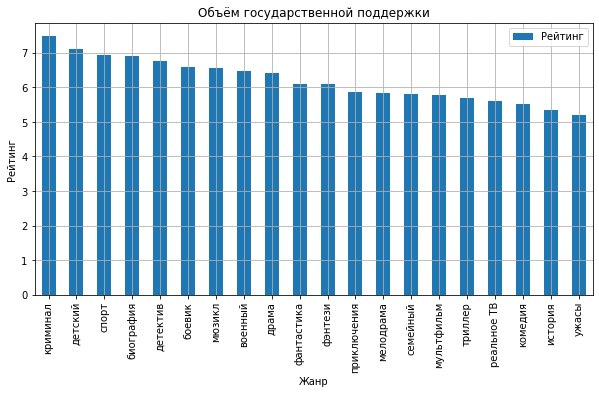

In [105]:
#посморим, какие фильмы с господдержкой больше имели самый высокий рейтинг
support.pivot_table(index='main_genres', values='ratings', aggfunc='mean')\
.sort_values(by='ratings', ascending=False) \
.plot(title='Объём государственной поддержки', kind='bar', grid=True, figsize=(10,5));
plt.xlabel('Жанр')
plt.ylabel('Рейтинг')
plt.legend(['Рейтинг'])
plt.show()

Самыми рейтинговыми картинами являются фильмы жанра "криминал"

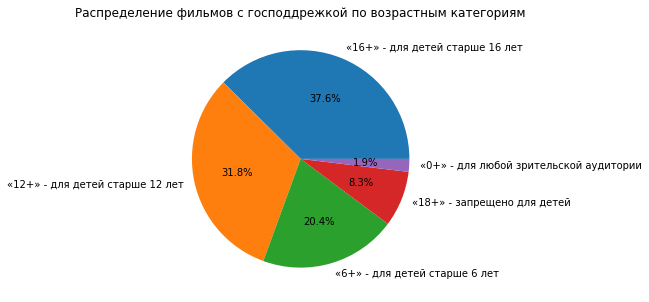

In [106]:
#посмотрим распределение по фильмов с господдержкой по категориям
support['age_restriction'].value_counts().plot(y='count', kind='pie', figsize=(5, 5), autopct='%1.1f%%')
plt.title('Распределение фильмов с господдрежкой по возрастным категориям')
plt.ylabel("")
plt.show()

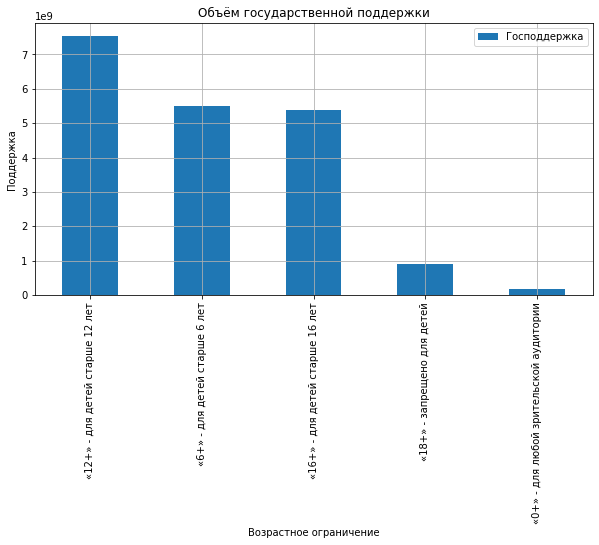

In [107]:
#посчитаем распределение средств господдержки по возрастным категориям
support.groupby('age_restriction').agg('sum').sort_values(by='total_support', ascending=False) \
.plot(y='total_support', title='Объём государственной поддержки', kind='bar', grid=True, figsize=(10,5), stacked=True);
plt.xlabel('Возрастное ограничение')
plt.ylabel('Поддержка')
plt.legend(['Господдержка'])
plt.show()

Наибольшую господдердку получают фильмы категории 12+

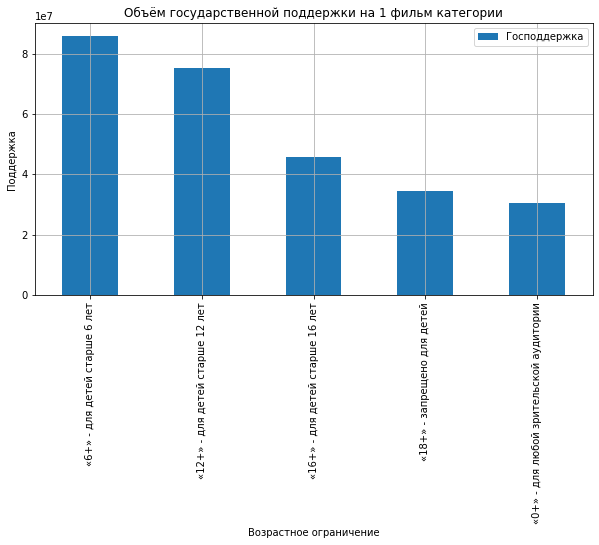

In [108]:
#посчитаем среднее распределение средств господдержки на 1 фильм каждой возрастной категории
support.groupby('age_restriction').agg('mean').sort_values(by='total_support', ascending=False) \
.plot(y='total_support', title='Объём государственной поддержки на 1 фильм категории', kind='bar', grid=True, figsize=(10,5), stacked=True);
plt.xlabel('Возрастное ограничение')
plt.ylabel('Поддержка')
plt.legend(['Господдержка'])
plt.show()

А среднем, на каждый фильм наибольшую подержку получают картины категории 6+

In [109]:
#посмотрим наиболее часто встречающихся продюссеров, чьи фильмы получили финансирование
support.pivot_table(index='producer', values='total_support', aggfunc='sum').sort_values(by='total_support', ascending=False).head(10)

,total_support
producer,
"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""","842,104,482.00"
"С.Сельянов, А.Боярский","630,000,000.00"
"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский","500,000,000.00"
"А.Максимов, К.Эрнст","500,000,000.00"
"А.Роднянский, С.Мелькумов","450,000,000.00"
"ООО ""Централ Партнершип"", АО ""Телекомпания""","350,000,000.00"
"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""","330,000,000.00"
"ООО ""Арт Пикчерс Студия""","330,000,000.00"
С.Сельянов,"325,000,000.00"


"Студия "ТРИТЭ" Никиты Михалкова получила в общей сложности 842 миллиона рублей

In [110]:
support.pivot_table(index='main_director', values='total_support', aggfunc='sum').sort_values(by='total_support', ascending=False).head(10)

,total_support
main_director,
Ф.Бондарчук,"750,000,000.00"
Н.Хомерики,"660,000,000.00"
А.Кравчук,"500,000,000.00"
А.Мизгирев,"450,000,000.00"
Н.Лебедев,"442,104,482.00"
А.Мегердичев,"400,000,000.00"
Р.Давлетьяров,"352,000,000.00"
Д.Дьяченко,"351,000,000.00"
И.Шурховецкий,"350,000,000.00"


Больше всего поддержки получил Федор Бондарчук

В результате исследования российских фильмов с господдержкой показано, что прибыльными были только 2017 и 2018 год. Пик господдержки пришелся на 2019 года, финансирование практически достигло 5 миллиардов рублей. В среднем поддержка одного фильма обходится в 70 млн., но встречаются случаи, когда фильму выделяется 500 млн.рублей государтсвенных средств.

Наиболее спонсируемыми являются фильмы жанра "драма", однако изучая рентабильность, можно увидеть, что они являются убиточными. Самыми рентабильными являются фильмы жанра "спорт" - за один фильм данного жанра прибыль составляет порядка 780млн. рублей.

Изучая распределение финансирования по возрастным категориям, фильмы категории 12+ получили наибольшую поддержку за весь период, однако в пересчете на 1 картину, дороже обходятся фильмы 6+.  

Самой спонсируемой является "Студия "ТРИТЭ" Никиты Михалкова, а самым финансово-затратным режиссером стал Федор Бондарук.

### Шаг 5. Напишите общий вывод

Перед исследовательским анализом, данные были приведены в верному типу, пропуски заполнены из открытых данных. Наибольшее количество ошибок содержалось в категориальных переменных, а также скорректированы значения рейтинга. 

В данных имеются дубликаты по названию фильма, но они имеют разные номера прокатных удостоверений, поэтому не были удалены.

С 2010 по 2016 год количество фильмов, выходивших в прокат, неизменно росло. Соответвующим образом росла и доля  фильмов от общего числа произведенных. Максимальное значение доли показанных в кинотеатре фильмов - 70,7% пришлась на 2017 год, однако количество произведенных фильмов в этом году было мало, и большая часть из них попала в прокат.

Самым кассовым стал период с 2016 по 2019 год. Сумма сборов за каждый год приближалась к 5 миллиардам рублей. Самая большая средняя сумма сборов наблюдалась в 2017 году, там же и самое большое медианное значение - каждый фильм заработал около 10 миллионов рублей.

Самая кассовая возрастная категория за период с 2015 по 2019 год - категория 16+, наименьшие показатели у картин с возрастным ограничением 18+. 

Количество фильмов с господдержкой составляет около 5% от всех фильмов, выпущенных в прокат за исследуемый период.

Изучая российские картины с господдержкой, можно сделать неутешительный вывод, что окупаются только 25% картин. Прибыльными стали только 2017 и 2018 год. Самую большую финансовую поддержку получили картины в 2019 году. Распределение бюджетных средств неоднородно. К примеру можно отметить, как в 2016 году медианное значение господдерджки составило 75 миллионов рублей, однако в этот же год была картина, которая получила 450 миллионов государственных денег. 

Больше всего бюджетных средств получили фильмы жанра "драма", которые являются убыточными, однако самыми рентабильными оказались картины жанра "комедии". Наибольшее финансирование на 1 фильм получают картины с жанром "история".

Среди производителей, самой спонсируемой является "Студия "ТРИТЭ" Никиты Михалкова, а самым финансово-затратным режиссером стал Федор Бондарук.

Учитывая изученные данные по рентабильности, можно порекомендовать произвоводителям картин обратить внимание на жанр "комедия". Самая большая рентабильность на один произведенный фильм у жанра "спорт", однако за весь период представлено всего 3 картины, и  почти вся рентабильность приходится на 1 фильм - "Движение вверх". 